Original Statistics:
  Mean:   53.50
  Median: 53.00
  Std:    5.68

Bootstrap Standard Errors:
  Mean SE:   1.6881
  Median SE: 2.9342
  Std SE:    0.8369

95% Confidence Intervals:
  Mean:   (50.20, 56.80)
  Median: (49.00, 58.50)
  Std:    (3.60, 6.88)


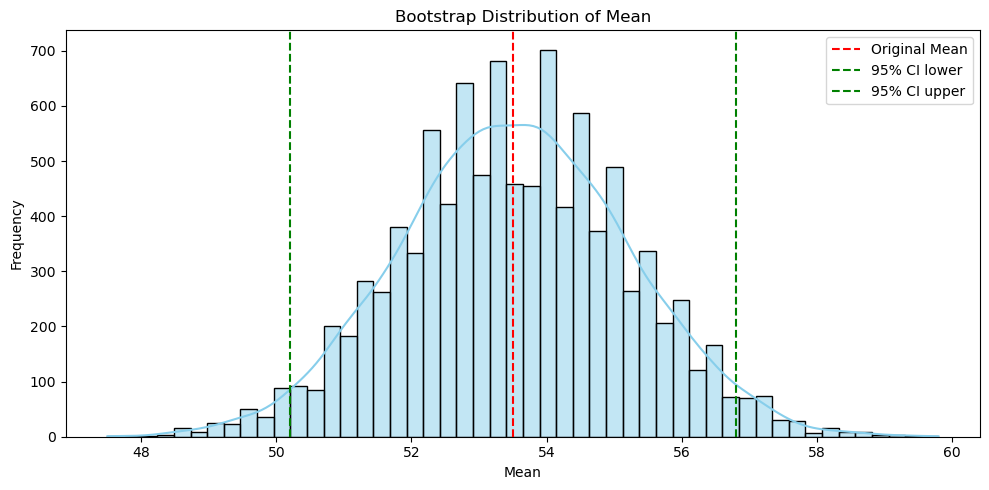

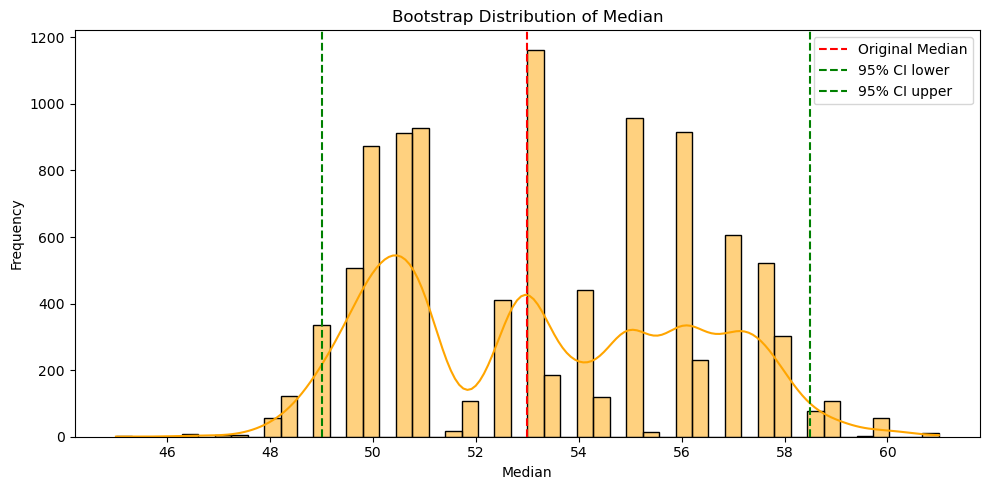

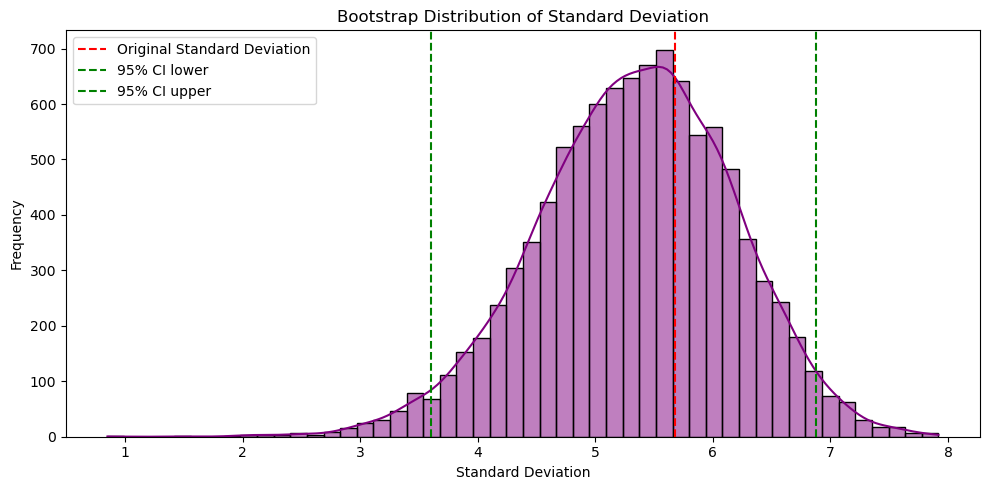

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Random seed for reproducibility
np.random.seed(42)

# Sample dataset (e.g., income in thousands)
data = np.array([45, 50, 55, 48, 60, 58, 62, 51, 49, 57])

# Bootstrapping parameters
n_iterations = 10000
sample_size = len(data)

# -----------------------------
# BOOTSTRAPPING
# -----------------------------
# Lists to store statistics from bootstrap samples
bootstrap_means = []
bootstrap_medians = []
bootstrap_stds = []

for _ in range(n_iterations):
    # Sample with replacement from the original data
    sample = np.random.choice(data, size=sample_size, replace=True)
    
    # Compute statistics for this bootstrap sample
    bootstrap_means.append(np.mean(sample))
    bootstrap_medians.append(np.median(sample))
    bootstrap_stds.append(np.std(sample, ddof=1))  # Use sample std (ddof=1)

# Convert lists to NumPy arrays for further analysis
bootstrap_means = np.array(bootstrap_means)
bootstrap_medians = np.array(bootstrap_medians)
bootstrap_stds = np.array(bootstrap_stds)


# ORIGINAL STATISTICS
original_mean = np.mean(data)
original_median = np.median(data)
original_std = np.std(data, ddof=1)

# BOOTSTRAP STANDARD ERRORS
se_mean = np.std(bootstrap_means)
se_median = np.std(bootstrap_medians)
se_std = np.std(bootstrap_stds)

# 95% CONFIDENCE INTERVALS
ci_mean = np.percentile(bootstrap_means, [2.5, 97.5])
ci_median = np.percentile(bootstrap_medians, [2.5, 97.5])
ci_std = np.percentile(bootstrap_stds, [2.5, 97.5])

# -----------------------------
# RESULTS OUTPUT
# -----------------------------

print("Original Statistics:")
print(f"  Mean:   {original_mean:.2f}")
print(f"  Median: {original_median:.2f}")
print(f"  Std:    {original_std:.2f}")

print("\nBootstrap Standard Errors:")
print(f"  Mean SE:   {se_mean:.4f}")
print(f"  Median SE: {se_median:.4f}")
print(f"  Std SE:    {se_std:.4f}")

print("\n95% Confidence Intervals:")
print(f"  Mean:   ({ci_mean[0]:.2f}, {ci_mean[1]:.2f})")
print(f"  Median: ({ci_median[0]:.2f}, {ci_median[1]:.2f})")
print(f"  Std:    ({ci_std[0]:.2f}, {ci_std[1]:.2f})")

# -----------------------------
# VISUALIZATION
# -----------------------------

def plot_bootstrap_distribution(values, original_value, ci, label, color):
    plt.figure(figsize=(10, 5))
    sns.histplot(values, bins=50, kde=True, color=color)
    plt.axvline(original_value, color='red', linestyle='--', label=f'Original {label}')
    plt.axvline(ci[0], color='green', linestyle='--', label='95% CI lower')
    plt.axvline(ci[1], color='green', linestyle='--', label='95% CI upper')
    plt.title(f"Bootstrap Distribution of {label}")
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each statistic
plot_bootstrap_distribution(bootstrap_means, original_mean, ci_mean, "Mean", "skyblue")
plot_bootstrap_distribution(bootstrap_medians, original_median, ci_median, "Median", "orange")
plot_bootstrap_distribution(bootstrap_stds, original_std, ci_std, "Standard Deviation", "purple")